In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
rcParams["figure.figsize"] = (14,11)
rcParams["font.size"] = 20

1. Add 4th wave packet (frequency = 4 and time_shift = 7 cycles). Demonstrate the effect on the plot of the FFT spectrum.

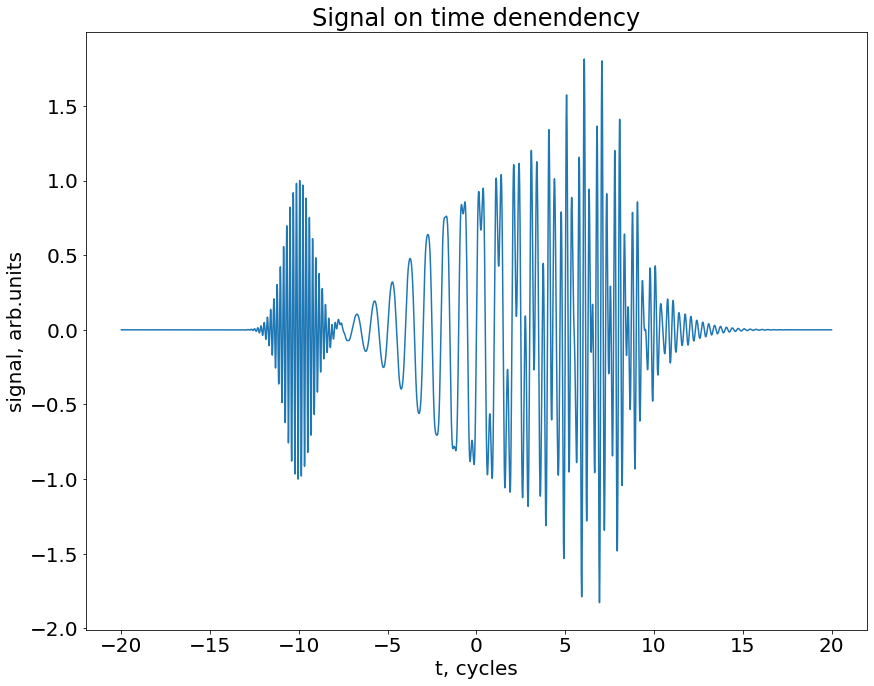

In [53]:
# generate the signal
t = linspace(-20*2*pi, 20*2*pi, 3**9+6)

y = sin(t)*exp(-t**2/2/20**2)
y += sin(3*t)*exp(-(t-5*2*pi)**2/2/20**2)
y += sin(5.5*t)*exp(-(t+10*2*pi)**2/2/5**2)
y += sin(4*t)*exp(-(t-7*2*pi)**2/2/10**2) # added 4th wave packet

plt.title('Signal on time denendency');
plt.plot(t/2/pi,y)
xlabel('t, cycles')
ylabel('signal, arb.units')
plt.show()

Text(0, 0.5, 'Power spectrum, arb. units')

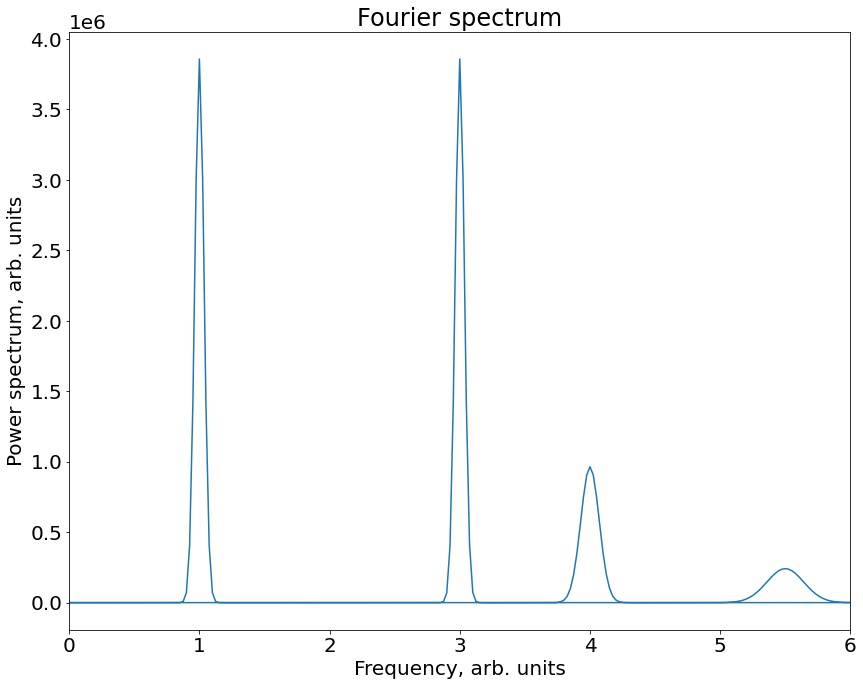

In [54]:
# Fourier spectrum
sp = fft.fft(y)
w = fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
plot(w, abs(sp)**2)
xlim(0,6)
plt.title('Fourier spectrum');
xlabel('Frequency, arb. units')
ylabel('Power spectrum, arb. units')


2.Implement the spectrogram, show the effect of (1) on the spectrogram. Don’t forget to label the axes

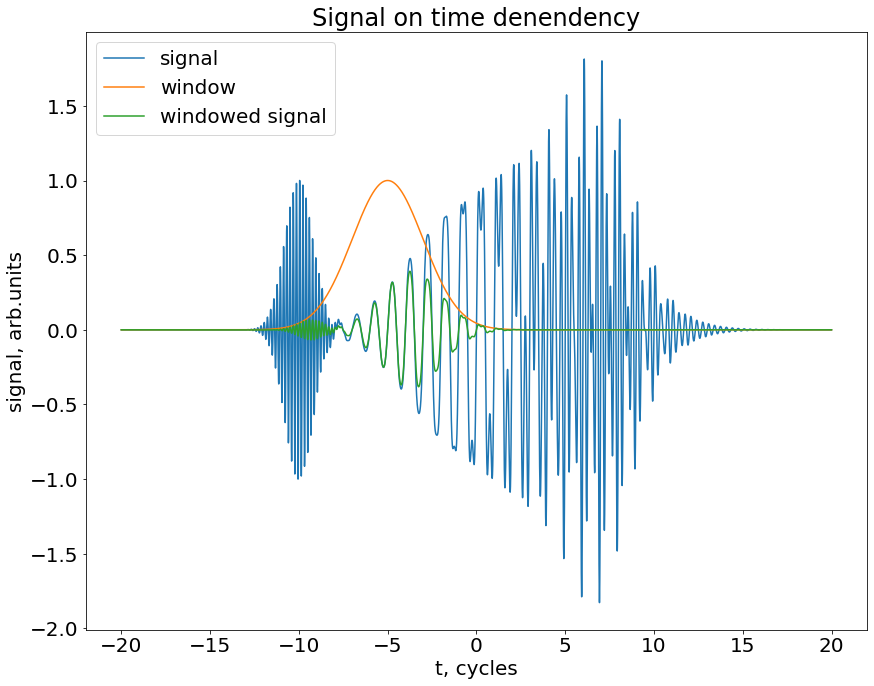

In [55]:
# windowed Fourier transform (Gabor transform, spectrogram)

window_width=2.0*2*pi
window_position=-5.0*2*pi
window_function=exp(-(t-window_position)**2/2/window_width**2)

y_window=y * window_function

plt.title('Signal on time denendency');
plot(t/2/pi, y, label = 'signal')
plot(t/2/pi, window_function, label = 'window')
plot(t/2/pi, y_window , label = 'windowed signal')
legend()
xlabel('t, cycles')
ylabel('signal, arb.units')
plt.show()


In [49]:
def get_specgram(y, t, nwindowsteps=1000):
    window_t = linspace(-20*2*pi, 20*2*pi, nwindowsteps)
    specgram = zeros((len(t), nwindowsteps))
    window_width = 2.0 * 2 * pi
   
    for n, w_t in enumerate(window_t):
      window_function = exp(-(t - w_t) ** 2 / 2 / window_width ** 2)
      specgram[:, n] = abs(fft.fft(y * window_function))

    return specgram

In [50]:
#unmodified waves
y = sin(t)*exp(-t**2/2/20**2)
y += sin(3*t)*exp(-(t-5*2*pi)**2/2/20**2)
y += sin(5.5*t)*exp(-(t+10*2*pi)**2/2/5**2)

#modified
y_m = y +  sin(4*t)*exp(-(t-7*2*pi)**2/2/10**2) # added 4th wave packet

specgram = get_specgram(y, t, 1000)
specgram_m = get_specgram(y_m, t, 1000)

w = fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
w_m = fft.fftfreq(len(y_m), d=(t[1]-t[0])/2/pi)

Text(0, 0.5, 'Frequency, arb. units')

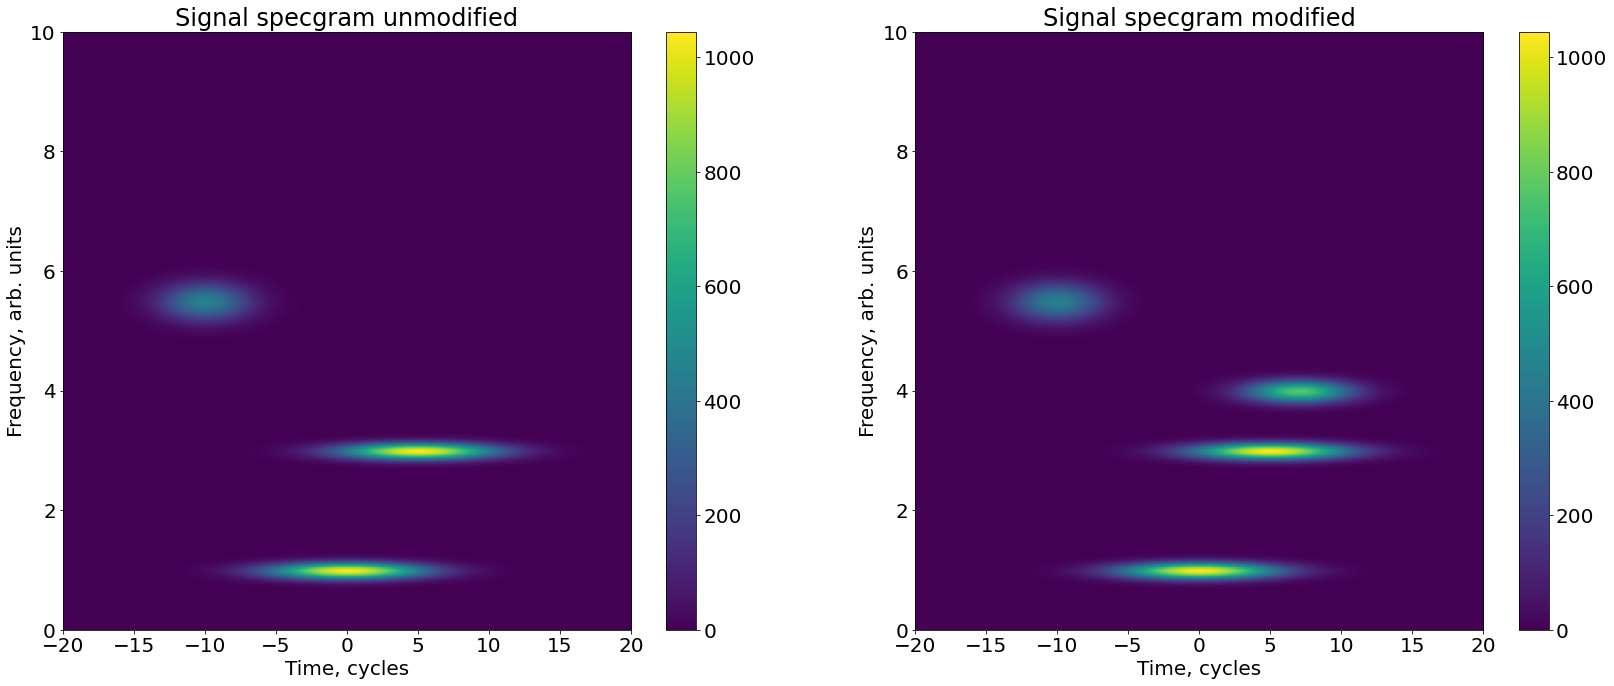

In [51]:
#plot specgram
figure (figsize = (28,11))
subplot(1, 2, 1)
imshow(specgram, aspect='auto', extent=[min(t)/(2*pi), max(t)/(2*pi), w[0] , 2 * w[int(len(w)/2)-1]])
colorbar()
ylim(0,10)
tick_params(axis='both')
title('Signal specgram unmodified')
xlabel('Time, cycles')
ylabel('Frequency, arb. units')


#plot specgram
subplot(1, 2, 2)
imshow(specgram_m, aspect='auto', extent=[min(t)/(2*pi), max(t)/(2*pi), w_m[0] , 2 * w_m[int(len(w_m)/2)-1]])
colorbar()
ylim(0,10)
tick_params(axis='both')
title('Signal specgram modified')
xlabel('Time, cycles')
ylabel('Frequency, arb. units')


On the spectrogram the magnitude of the windowed discrete-time Fourier transform of a signal can be seen. Spots tell us about the number of waves ( sine functions) and their influence on the signal amplitude - the more bright the spot - the more amplitude it has.

3.Change the number of time steps in your signal to the power of 2 (i.e. 2**14) and then slightly change the number of timesteps (i.e 2**14 +- 5). Measure the timing, can you explain the difference? Write something as a possible explanation.

In [45]:
timesteps = [2**14 + i for i in range (-5,6 )]
i = -5
for steps in timesteps:
    t = np.linspace(-20*2*pi, 20*2*pi, steps) 
    y = sin(t)*exp(-t**2/2/20**2)
    y += sin(3*t)*exp(-(t-5*2*pi)**2/2/20**2)
    y += sin(5.5*t)*exp(-(t+10*2*pi)**2/2/5**2)
    y +=  sin(4*t)*exp(-(t-7*2*pi)**2/2/10**2)

    print(f"Timestep: 2**14 +({i}) ,\n")
    i+=1
    %timeit get_specgram(y, t)


Timestep: 2**14 +(-5) ,

1 loop, best of 5: 3.26 s per loop
Timestep: 2**14 +(-4) ,

1 loop, best of 5: 1.18 s per loop
Timestep: 2**14 +(-3) ,

1 loop, best of 5: 3.29 s per loop
Timestep: 2**14 +(-2) ,

1 loop, best of 5: 3.32 s per loop
Timestep: 2**14 +(-1) ,

1 loop, best of 5: 1.89 s per loop
Timestep: 2**14 +(0) ,

1 loop, best of 5: 1.13 s per loop
Timestep: 2**14 +(1) ,

1 loop, best of 5: 1.83 s per loop
Timestep: 2**14 +(2) ,

1 loop, best of 5: 3.13 s per loop
Timestep: 2**14 +(3) ,

1 loop, best of 5: 3.16 s per loop
Timestep: 2**14 +(4) ,

1 loop, best of 5: 3.14 s per loop
Timestep: 2**14 +(5) ,

1 loop, best of 5: 3.16 s per loop


The difference can be explained by the better perfomance speed of FFT, that performing a power of 2 allows one to perform the FFT in $O(Nlog(N))$ instead of $O(N^2)$. 